Logistic regression
=

p( y = 1 | x,w) = sigmoid(w.T * X^i) 


p( y = 0 | x,w) = 1 -  sigmoid(w.T * X^i) 

_______________________________________________________________________________________________________________________________________________________

.The sigmoid function tells us which class each data point is likely to be in.

.sigmoid ------>  1 / 1 + e ** -z

-------------------------------------------------------------------------------
.Cost or loss that calculates the model

.cross-entropy ------> [y**i log(sigmoid(w.T *x**i)) + (1 -y **i)log(1-sigmoid(w.T *x**i))]

---------------------------------------------------------------------------------------------

.Then we can use the gradient to update the weights and then we can move on to training the model.

.grad -----> W = W - learningrate * sigmoid((w.T * x**i) - y**i)x**i 

__________________

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report

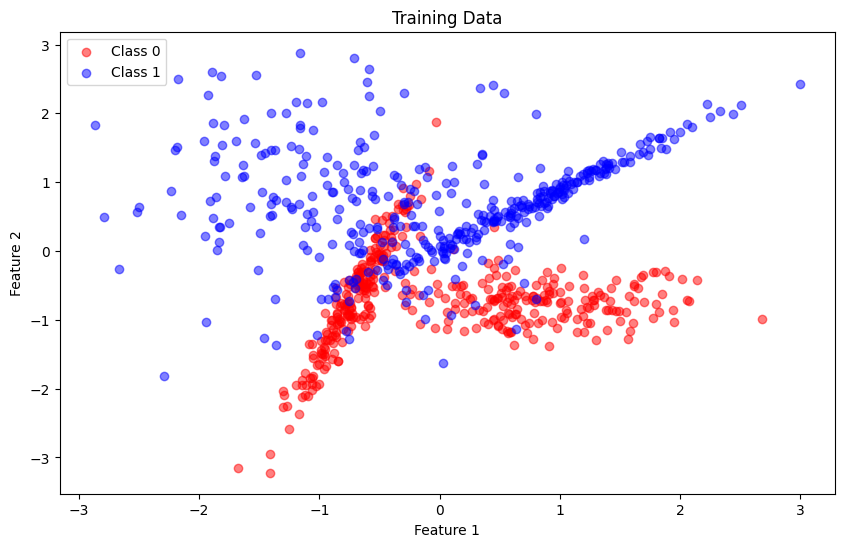

In [5]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0', alpha=0.5)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1', alpha=0.5)
plt.title('Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [8]:
model = LogisticRegression(max_iter=1000)  
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1] 

In [16]:
accuracy = accuracy_score(y_val, y_pred)
loss = log_loss(y_val, y_pred_proba)
print("accuracy")
print(accuracy)
print("-----------------")
print("loss")     
print(loss)
print("-----------------")

print('Weights (Coefficients):')
print(model.coef_)
print('Intercept:')
print(model.intercept_)
print("-----------------")

conf_matrix = confusion_matrix(y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print("-----------------")

print('Classification Report:')
print(classification_report(y_val, y_pred))

accuracy
0.88
-----------------
loss
0.2877193356834313
-----------------
Weights (Coefficients):
[[-0.42006546  2.81384856]]
Intercept:
[0.18993475]
-----------------
Confusion Matrix:
[[89 12]
 [12 87]]
-----------------
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       101
           1       0.88      0.88      0.88        99

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



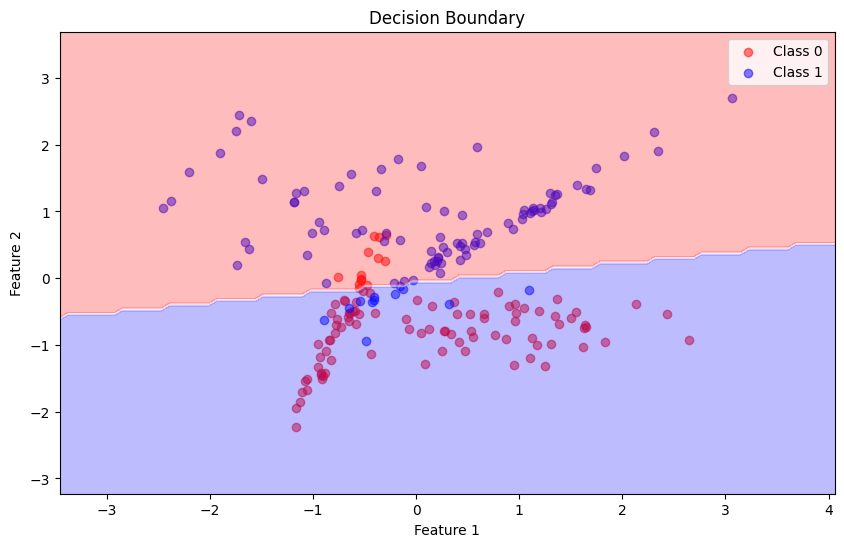

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(X_val[y_val == 0, 0], X_val[y_val == 0, 1], color='red', label='Class 0', alpha=0.5)
plt.scatter(X_val[y_val == 1, 0], X_val[y_val == 1, 1], color='blue', label='Class 1', alpha=0.5)

x_min, x_max = X_val[:, 0].min() - 1, X_val[:, 0].max() + 1
y_min, y_max = X_val[:, 1].min() - 1, X_val[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')

plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()